In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
import os 

In [2]:
os.chdir('D:\Pranav\ML\Datasets\Fish')

In [3]:
df = pd.read_csv('Fish.csv')

In [4]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [5]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [6]:
df['Weight'].replace(0, np.nan, inplace = True)
df.dropna(inplace = True)
df.index = range(158)

In [7]:
df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

C:\Users\Pranav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Species', ylabel='count'>

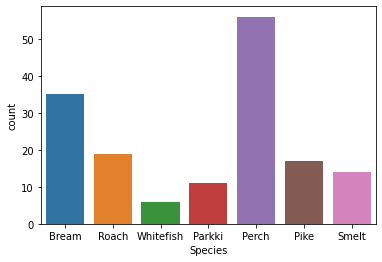

In [8]:
sns.countplot(df['Species'])

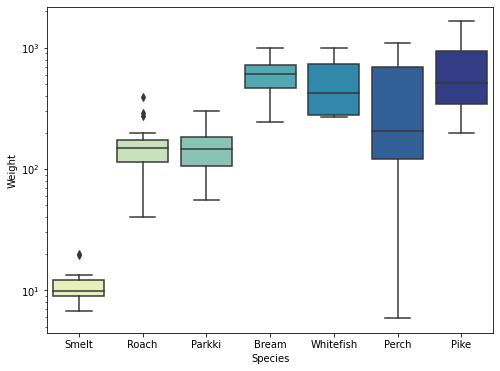

In [9]:
plt.figure(figsize = (8,6))

sns.boxplot(x = 'Species', y = 'Weight', data = df, palette = 'YlGnBu',
           order = ['Smelt', 'Roach', 'Parkki', 'Bream', 'Whitefish','Perch', 'Pike'])

plt.yscale('log')
plt.show()

<Figure size 576x432 with 0 Axes>

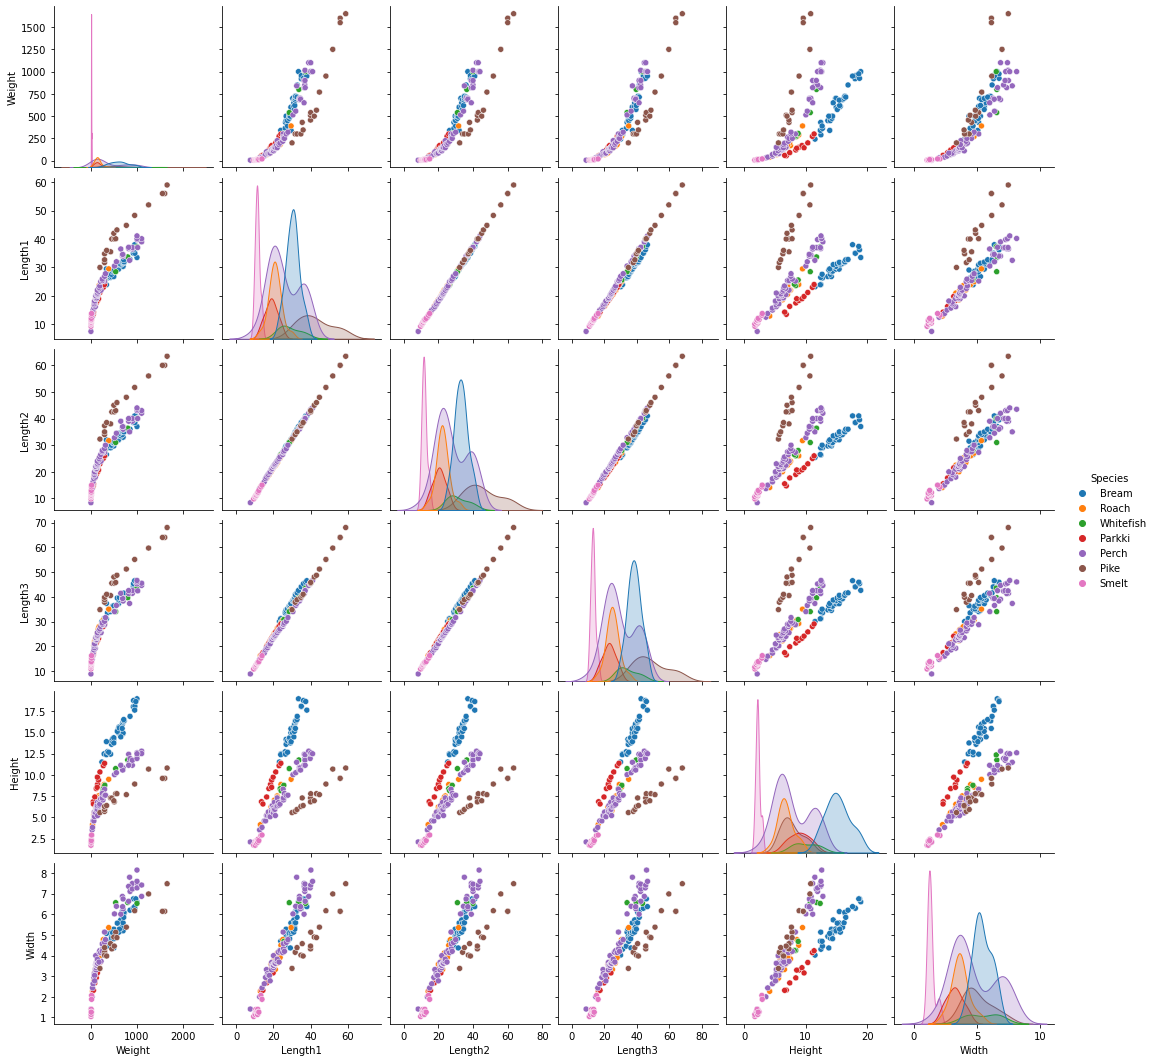

In [10]:
plt.figure(figsize = (8,6))
sns.pairplot(data=df, hue='Species')

<AxesSubplot:xlabel='Length3', ylabel='Weight'>

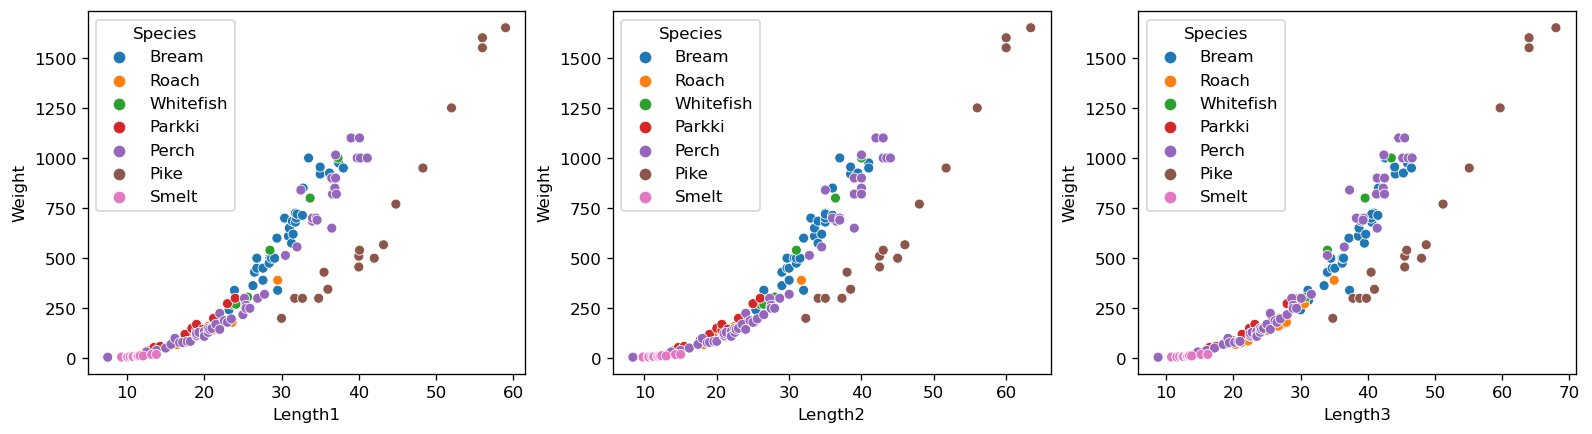

In [11]:
fig, ax = plt.subplots(1,3, figsize = (16,4), dpi = 120)
sns.scatterplot(data=df, x=df['Length1'], y= df['Weight'], hue = df['Species'],ax=ax[0])
sns.scatterplot(data=df, x=df['Length2'], y= df['Weight'], hue = df['Species'],ax=ax[1])
sns.scatterplot(data=df, x=df['Length3'], y= df['Weight'], hue = df['Species'],ax=ax[2])

<AxesSubplot:xlabel='Width', ylabel='Weight'>

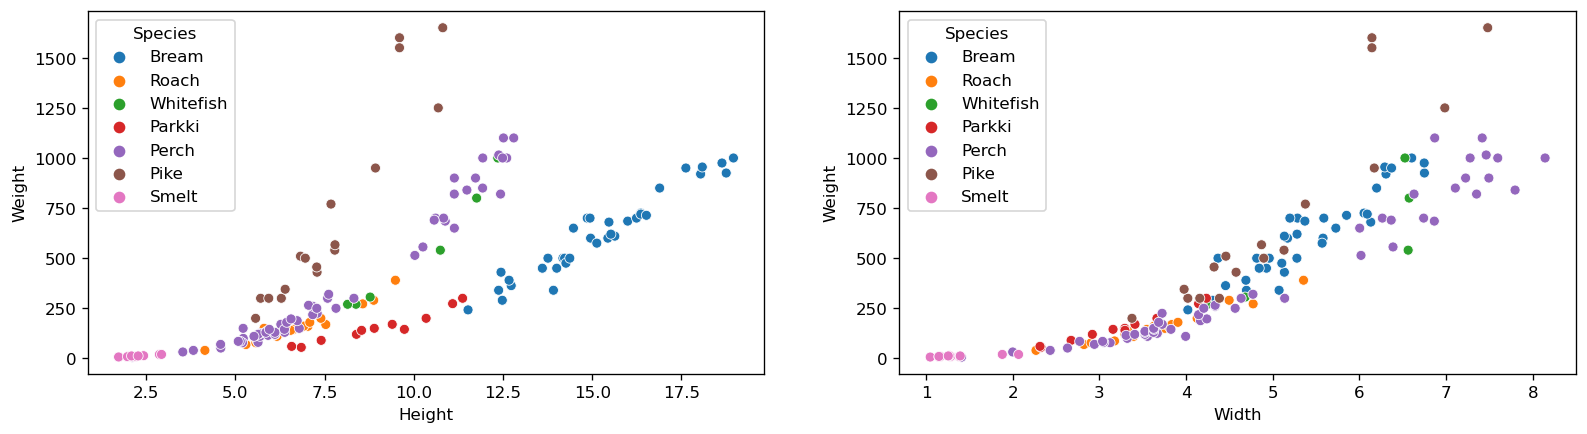

In [12]:
fig, ax = plt.subplots(1,2, figsize = (16,4), dpi = 120)
sns.scatterplot(data=df, x=df['Height'], y= df['Weight'], hue = df['Species'],ax=ax[0])
sns.scatterplot(data=df, x=df['Width'], y= df['Weight'], hue = df['Species'],ax=ax[1])

<AxesSubplot:xlabel='Weight', ylabel='Density'>

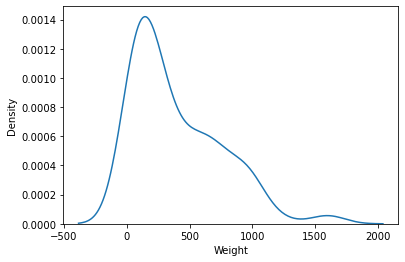

In [13]:
sns.kdeplot(data=df, x= df['Weight'])

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['Species'])
df['Species']=le.transform(df['Species'])

<AxesSubplot:>

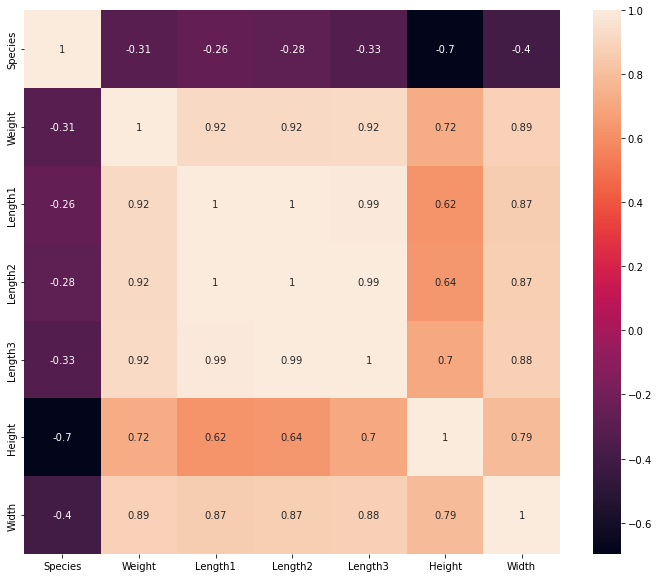

In [15]:
corr=df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(data=corr, annot = True)

In [16]:
x=df.drop(labels=['Weight', 'Length2'],axis=1)
y=df.iloc[:,1]

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=42)

In [18]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(x_train, y_train)
y_predict=linear.predict(x_test)

In [19]:
from sklearn.metrics import r2_score
r2_score(y_test, y_predict)*100

89.69614185875707